In [1]:
import json

In [2]:
f = open('manual_marks.json', 'r')
data = json.load(f)

In [3]:
for i in data:
    print(i)

_via_settings
_via_img_metadata
_via_attributes
_via_data_format_version
_via_image_id_list


In [4]:
metadata = data['_via_img_metadata']
marked = []
for key, value in metadata.items():
    if len(metadata[key]) > 0:
        marked.append(metadata[key])

In [5]:
marked[0]['regions'][1]['shape_attributes']['all_points_x']

[347,
 325,
 305,
 300,
 297,
 297,
 298,
 299,
 299,
 303,
 309,
 317,
 322,
 321,
 317,
 311,
 307,
 303,
 303,
 301,
 301,
 311,
 333,
 353,
 370,
 389,
 399,
 417,
 423,
 429,
 437,
 457,
 473,
 479,
 485,
 492,
 492,
 487,
 480,
 468,
 462,
 459,
 454,
 447,
 441,
 438,
 426,
 412,
 390,
 364]

In [6]:
def rearrange_data(img_data):
    polygons = []
    
    for r in img_data['regions']:
        points = []
        
        attribs = r['shape_attributes']
        for i in range(len(attribs['all_points_x'])):
            points.append([ attribs['all_points_y'][i], attribs['all_points_x'][i] ])
        
        polygons.append(points)

    return {'filename': img_data['filename'], 'polygons': polygons}

In [7]:
d = list(map(rearrange_data, marked))
d[0]

{'filename': '000001.jpg',
 'polygons': [[[37, 193],
   [47, 161],
   [95, 104],
   [139, 87],
   [217, 64],
   [272, 49],
   [304, 49],
   [355, 35],
   [396, 25],
   [400, 26],
   [363, 51],
   [340, 83],
   [329, 114],
   [331, 153],
   [345, 182],
   [340, 193],
   [307, 196],
   [281, 204],
   [249, 211],
   [221, 217],
   [191, 225],
   [168, 235],
   [140, 243],
   [101, 243],
   [71, 243],
   [49, 232],
   [35, 208]],
  [[36, 347],
   [34, 325],
   [43, 305],
   [53, 300],
   [73, 297],
   [91, 297],
   [109, 298],
   [111, 299],
   [115, 299],
   [121, 303],
   [121, 309],
   [123, 317],
   [131, 322],
   [142, 321],
   [153, 317],
   [167, 311],
   [175, 307],
   [183, 303],
   [194, 303],
   [206, 301],
   [218, 301],
   [229, 311],
   [241, 333],
   [247, 353],
   [259, 370],
   [274, 389],
   [293, 399],
   [329, 417],
   [341, 423],
   [343, 429],
   [344, 437],
   [350, 457],
   [359, 473],
   [372, 479],
   [384, 485],
   [369, 492],
   [350, 492],
   [327, 487],
   [29

(228, 250)


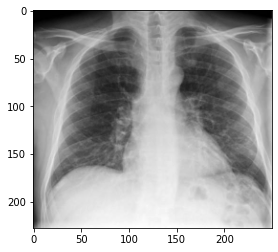

In [9]:
import skimage
from skimage import io
from skimage.transform import resize
from matplotlib import pyplot as plt

polygon_data = d[0]
crop_w = 250

img_loc = f'covid-chestxray-dataset/images/{polygon_data["filename"]}'
img = io.imread(img_loc, as_gray=True)
orig_shape = img.shape
img = resize(img, [ round(crop_w*img.shape[0]/img.shape[1]), crop_w ])
print(img.shape)
plt.imshow(img, cmap=plt.cm.gray)

[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]


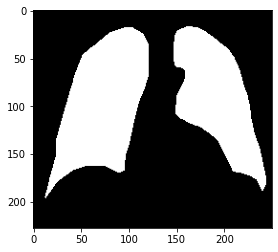

In [10]:
from skimage.draw import polygon2mask
import numpy as np
from functools import reduce

mask = []
for p in polygon_data['polygons']:
    mask.append(polygon2mask(orig_shape, p))
print(mask)
mask = reduce(np.bitwise_or, mask)
mask = resize(mask, img.shape )

plt.imshow(mask, cmap=plt.cm.gray)

(228, 250)
(228, 250)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


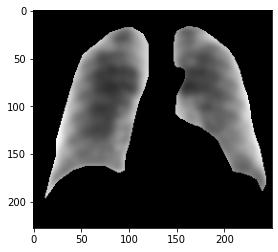

In [11]:
from skimage.filters import gaussian

blurred = gaussian(img, sigma=3)
masked_img = skimage.img_as_int(blurred*mask)
plt.imshow(masked_img, cmap=plt.cm.gray)
masked_img.max()
print(masked_img)

In [27]:
from skimage.measure import regionprops
#from skimage.feature import greycomatrix, greycoprops

props = regionprops(masked_img)
#glcm = greycomatrix(masked_img, [1], [0, np.pi/2], levels=21288)
#gray_props = greycoprops(glcm)

In [28]:
print(dir(skimage.feature))

['BRIEF', 'CENSURE', 'Cascade', 'ORB', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_basic_features', '_canny', '_cascade', '_daisy', '_haar', '_hessian_det_appx', '_hog', '_hoghistogram', '_orb_descriptor_positions', '_texture', 'blob', 'blob_dog', 'blob_doh', 'blob_log', 'brief', 'brief_cy', 'canny', 'censure', 'censure_cy', 'corner', 'corner_cy', 'corner_fast', 'corner_foerstner', 'corner_harris', 'corner_kitchen_rosenfeld', 'corner_moravec', 'corner_orientations', 'corner_peaks', 'corner_shi_tomasi', 'corner_subpix', 'daisy', 'deprecated', 'draw_haar_like_feature', 'draw_multiblock_lbp', 'greycomatrix', 'greycoprops', 'haar', 'haar_like_feature', 'haar_like_feature_coord', 'hessian_matrix', 'hessian_matrix_det', 'hessian_matrix_eigvals', 'hog', 'local_binary_pattern', 'masked_register_translation', 'match', 'match_descriptors', 'match_template', 'multiblock_lbp', 'multiscale_basic_features', 'orb',

In [31]:
features = {
    'area': 0,
    'perimeter': 0,
    'eccentricity': 0,
}
for p in props:
    features['area'] += p.area
    features['perimeter'] += p.perimeter
    features['eccentricity'] += p.eccentricity

features['eccentricity'] = features['eccentricity']/len(props)
    
features

{'area': 19227,
 'perimeter': 2.414213562373095,
 'eccentricity': 0.500353500091377}

10141